In [243]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../results/associations/combined_association_tables.csv', index_col=False)


In [244]:
#Redid this to make a way nicer table! - will have 4 tables in the end!
#all predictors
predictors = ['m_nmes', 
              'm_intrinsic_sugars',
              'm_starch', 
              'm_fiber', 
              'm_sucrose',
              'm_total_sugars']

#main manuscript predictors
predictors = ['m_nmes', 
              'm_intrinsic_sugars',
              'm_starch', 
              'm_fiber']

outcomes_blood = ['trig_log','ldl', 'hdl', 
       'hba1c_percent']

outcomes_anthro = ['bodyfat_percent','bmi', 'waistcirumference']

outcome_map = {'bodyfat_percent':'Body Fat (%)',
                     'bmi':'BMI (kg/m^2)',
                     'waistcirumference':'Waist Circumference (cm)',
                     'trig_log':'Triglycerides (mmol/L)',
                     'ldl':'LDL (mmol/L)',
                     'hdl':'HDL (mmol/L)',
                     'hba1c_percent':'HbA1c (%)'
                     }

predictor_map = {'m_nmes':'Non-Milk Extrinisic Sugars (g)',
                       'm_intrinsic_sugars':'Intrinsic Sugars (g)',
                       'm_starch':'Starch (g)',
                       'm_fiber':'Fiber (g)'}

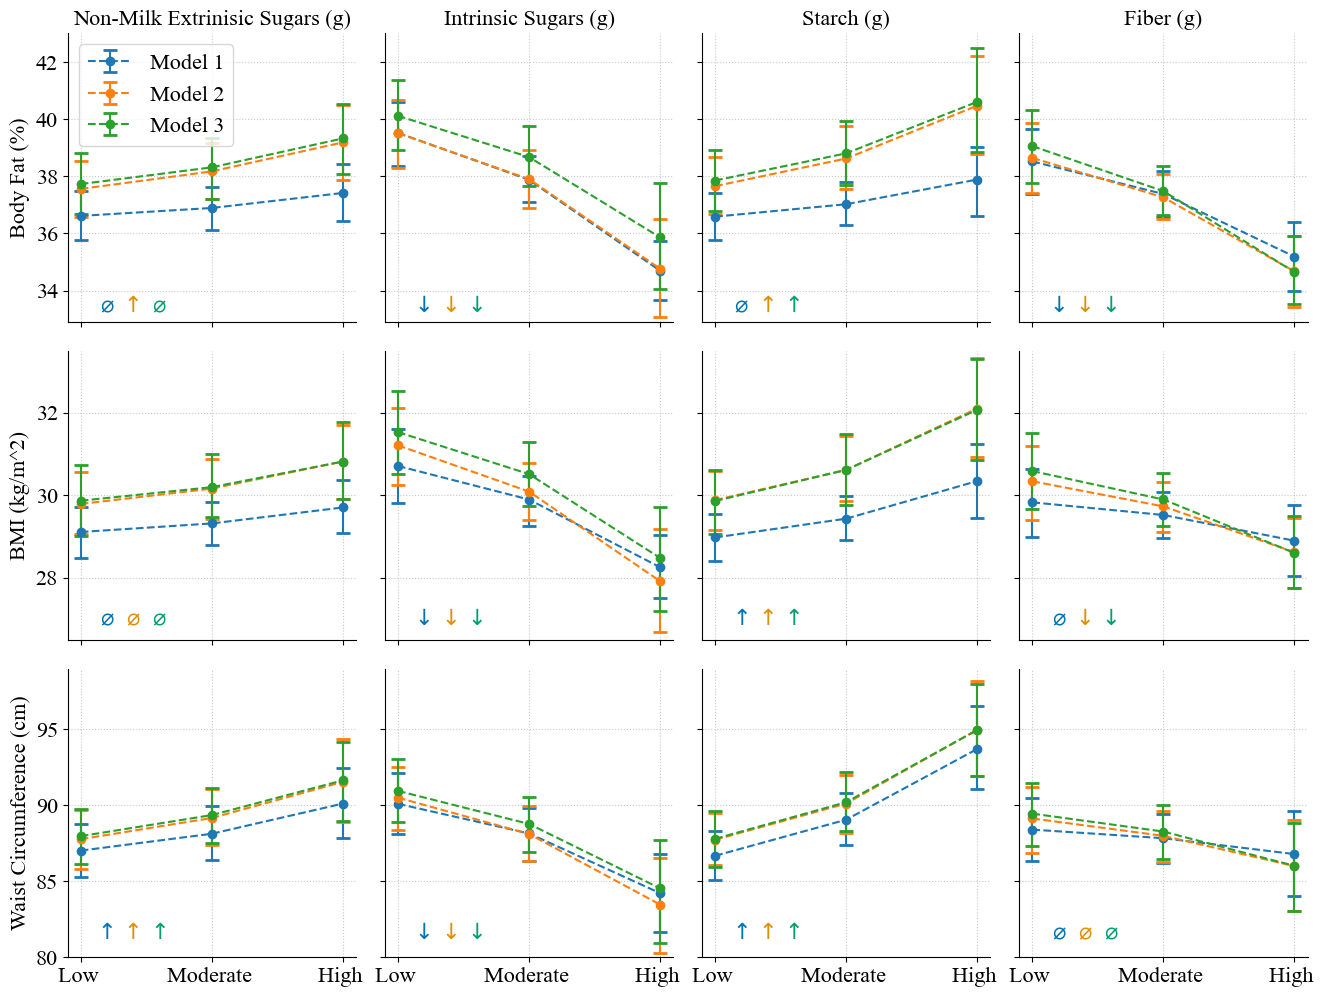

In [260]:
#Anthro 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

outcomes = outcomes_anthro

# Define a colorblind-friendly palette
color_palette = sns.color_palette("colorblind")

# Use a simple, clean Matplotlib style
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Times New Roman"

# Define same y ranges
ranges = [[32.9,43], [26.5,33.5], [80,99], [2.4,3], [1.4,1.8], [5.1,5.4], [0.9,1.42]]

fig, axes = plt.subplots(len(outcomes), 4, figsize=(4*4, 4*len(outcomes)), sharex=True, sharey=False)
axes = axes.flatten()

def determine_trend_symbol(data):
    """Determine trend symbol based on data trend"""
    lower = data['Contrast_CI_lower'].to_list()[0]
    upper = data['Contrast_CI_upper'].to_list()[0]

    if lower > 0 and upper > 0:
        return '↓'
    elif lower < 0 and upper < 0:
        return '↑'
    else:
        return '⌀'


for model_ctr in range(1, 4):
    ax_ctr = 0
    for i, outcome in enumerate(outcomes):
        axes[ax_ctr].set_ylabel(outcome_map[outcome])
        for pred_ctr, predictor in enumerate(predictors):
            if i == 0:
                axes[ax_ctr].set_title(predictor_map[predictor], fontsize=16)

            df = pd.read_csv(f'../results/associations/association_table_model_{model_ctr}.csv')
            df = df[(df['Predictor'] == predictor) & (df['Outcome'] == outcome)]
            df['x-labels'] = [ x.split('(')[0] for x in df['Tertiles']]

            axes[ax_ctr].errorbar(df['x-labels'], df['Mean'], 
                        yerr=[df['Mean'] - df['CI_lower'], df['CI_upper'] - df['Mean']],
                        fmt='o', capsize=5, capthick=2, linestyle='--', 
                        label=f'Model {model_ctr}')#,
                        #color=color_palette[model_ctr - 1])  # Use color from palette
            
            # Add the trend symbol underneath the curve
            x_pos = np.arange(len(df['x-labels']))
            y_pos = [df['Mean'].min() - 0.1] * len(x_pos)  # Positioning below the curve

            # Calculate the trend symbol
            trend_symbol = determine_trend_symbol(df)
            x, y = list(zip(x_pos, y_pos))[0]
            x += model_ctr * 0.2
            y = ranges[i][0] * 1.03

            axes[ax_ctr].text(x, y, trend_symbol, ha='center', va='top', fontsize=16, 
                              color=color_palette[model_ctr - 1],
                              fontdict={'family': 'DejaVu Sans'})

            axes[ax_ctr].spines['right'].set_visible(False)
            axes[ax_ctr].spines['top'].set_visible(False)
            ax_ctr += 1

axes[0].legend()

ax_ctr = 0
for i, outcome in enumerate(outcomes):
    for pred_ctr, predictor in enumerate(predictors):
        axes[ax_ctr].set_ylim(ranges[i])
        if predictor != 'm_nmes':
            # Remove y tick labels
            axes[ax_ctr].set_yticklabels([])
            #axes[ax_ctr].set_yticks([])
        ax_ctr += 1

# Add a light grid to all subplots
for ax in axes:
    ax.grid(True, linestyle=':', alpha=0.7)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
#plt.tight_layout()

plt.savefig('../results/associations/association_plots_anthro.pdf', dpi=300)
plt.show()


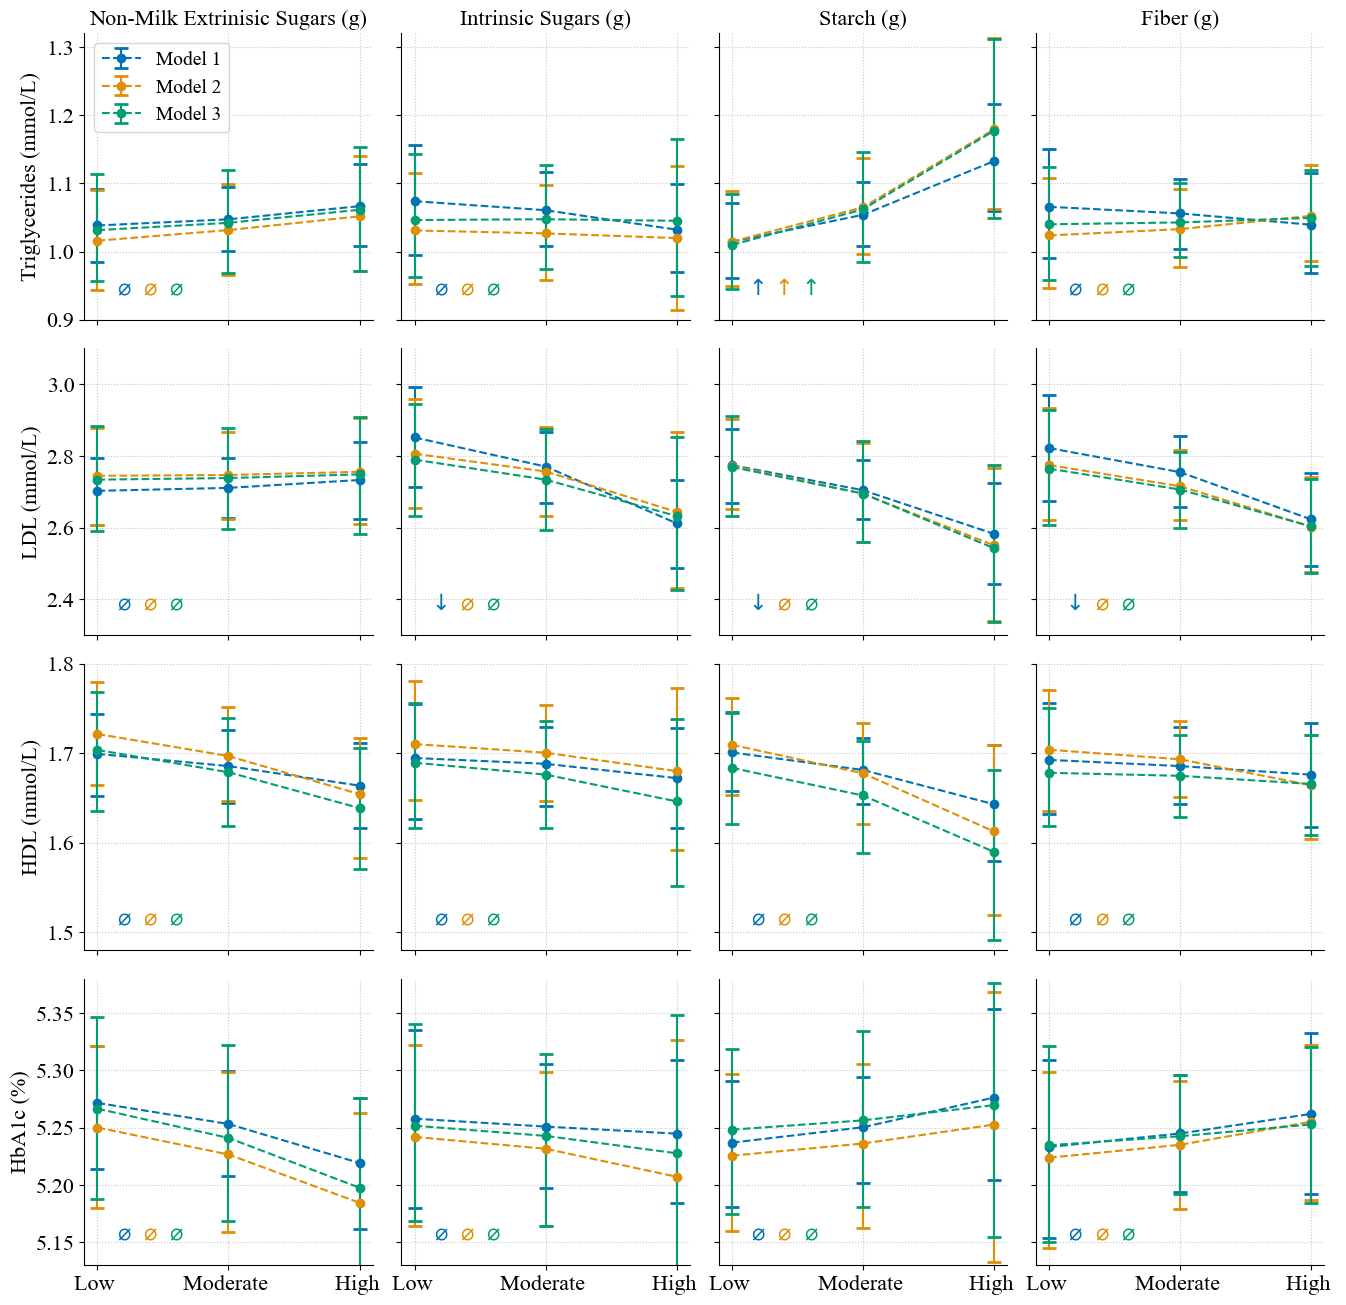

In [261]:
#Blood 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

outcomes = outcomes_blood

# Define a colorblind-friendly palette
color_palette = sns.color_palette("colorblind")

ranges = [[0.9,1.32], [2.3,3.1], [1.48,1.8],  [5.13,5.38]]

# Use a simple, clean Matplotlib style
plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Times New Roman"

fig, axes = plt.subplots(len(outcomes), 4, figsize=(4*4, 4*len(outcomes)), sharex=True, sharey=False)
axes = axes.flatten()

for model_ctr in range(1, 4):
    ax_ctr = 0
    for i, outcome in enumerate(outcomes):
        axes[ax_ctr].set_ylabel(outcome_map[outcome])
        for pred_ctr, predictor in enumerate(predictors):
            if i == 0:
                axes[ax_ctr].set_title(predictor_map[predictor],fontsize=16)

            df = pd.read_csv(f'../results/associations/association_table_model_{model_ctr}.csv')
            df = df[(df['Predictor'] == predictor) & (df['Outcome'] == outcome)]
            df['x-labels'] = [ x.split('(')[0] for x in df['Tertiles']]

            axes[ax_ctr].errorbar(df['x-labels'], df['Mean'], 
                        yerr=[df['Mean'] - df['CI_lower'], df['CI_upper'] - df['Mean']],
                        fmt='o', capsize=5, capthick=2, linestyle='--', 
                        label=f'Model {model_ctr}',
                        color=color_palette[model_ctr - 1])  # Use color from palette
            
            axes[ax_ctr].spines['right'].set_visible(False)
            axes[ax_ctr].spines['top'].set_visible(False)

            # Add the trend symbol underneath the curve
            x_pos = np.arange(len(df['x-labels']))
            y_pos = [df['Mean'].min() - 0.1] * len(x_pos)  # Positioning below the curve

            # Calculate the trend symbol
            trend_symbol = determine_trend_symbol(df)
            x, y = list(zip(x_pos, y_pos))[0]
            x += model_ctr * 0.2
            y = (ranges[i][1] - ranges[i][0]) * .15 + ranges[i][0]
            
            axes[ax_ctr].text(x, y, trend_symbol, ha='center', va='top', fontsize=16,
                               color=color_palette[model_ctr - 1],
                              fontdict={'family': 'DejaVu Sans'})

            ax_ctr += 1

axes[0].legend(fontsize=14, loc='upper left')

# Define same y ranges
ax_ctr = 0
for i, outcome in enumerate(outcomes):
    for pred_ctr, predictor in enumerate(predictors):
        axes[ax_ctr].set_ylim(ranges[i])
        if predictor != 'm_nmes':
            # Remove y tick labels
            axes[ax_ctr].set_yticklabels([])
            #axes[ax_ctr].set_yticks([])
        ax_ctr += 1

# Add a light grid to all subplots
for ax in axes:
    ax.grid(True, linestyle=':', alpha=0.7)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
#plt.tight_layout()
plt.savefig('../results/associations/association_plots_blood.pdf', dpi=300)
plt.show()